We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

## Data Collection Phase 
You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart 
watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites.
Basically, we need these columns1) reviews of the product.
2) rating of the product.
You can fetch other data as well, if you think data can be useful or can help in the project. It 
completely depends on your imagination or assumption.

## Hint:
• Try to fetch data from different websites. If data is from different websites, it will help our 
model to remove the effect of over fitting.
• Try to fetch an equal number of reviews for each rating, for example if you are fetching
10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.
• Convert all the ratings to their round number, as there are only 5 options for rating i.e., 
1,2,3,4,5. If a rating is 4.5 convert it 5.

## Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.
Follow the complete life cycle of data science. Include all the steps like1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
import string
import nltk
from nltk.corpus import  stopwords


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [23]:
df = pd.read_csv('rating_data')
df

,Unnamed: 0,Rating,Review
0,0,1,very bad experience
1,1,1,Printer Came Damaged Worst product
2,2,3,Only for plain paper printing.
3,3,3,Ok printing
4,4,1,Defective piece received.
...,...,...,...
23387,23387,5,Must have device
23388,23388,4,Good product
23389,23389,4,Good
23390,23390,1,Battery Backup


In [24]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Rating,Review
0,1,very bad experience
1,1,Printer Came Damaged Worst product
2,3,Only for plain paper printing.
3,3,Ok printing
4,1,Defective piece received.
...,...,...
23387,5,Must have device
23388,4,Good product
23389,4,Good
23390,1,Battery Backup


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23392 entries, 0 to 23391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  23392 non-null  int64 
 1   Review  23390 non-null  object
dtypes: int64(1), object(1)
memory usage: 365.6+ KB


In [26]:
df['Rating'].value_counts()

5    9661
1    5781
4    4687
3    1969
2    1294
Name: Rating, dtype: int64

In [27]:
df.isnull().sum() 

Rating    0
Review    2
dtype: int64

In [28]:
df.dropna(inplace=True)
df.shape

(23390, 2)

In [29]:
#Converting into lower case
df['Review']=df['Review'].str.lower() 

In [30]:
# Replace email addresses with 'email'
df['Review']=df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['Review']=df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress') 

<ipython-input-30-295ed2fd10b7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review']=df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
<ipython-input-30-295ed2fd10b7>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review']=df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',


In [31]:
#removing noise and repetation of data 
stoplist=['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','only','own','same','so','than','too','very','s','t','can','will','just','should',"should've",'now','d','ll','m','o','re','ve','y']

In [32]:
#add some unnecessary words which are present in reviews
stoplist=stoplist+['printer','cannon','tplink','port','cartridges','customer','smartphone','home','ok','dslr','due','laptop','product','flipkart','u', 'ü', 'ur', '4', '2', 'im', 'doin', 'ure','since','also','hp','windows','day','like','k','upto','later','today','hour','hours','kg','gb','ram','ssd','products','app','watch','phone','online','class','game','student','prodect','printer','amazon','quality','router','use','signal','got','hp','range','printing','custoemr','service','ink','purchase','phone','star','stars','battery','camera','voice','money','headphone','cannon','1500d','received','router','package','wifi','price','cartridge','card','job','print','working','okay','photo','cost','option','modem','paper','bass','tp','link','installation','time','headphone','page','please','take','much','ear','cd','m31','brand','review','charger','go','cloudtail','providing']

In [33]:
df['Review'] = df['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stoplist)) 

In [34]:
df

,Rating,Review
0,1,bad experience
1,1,came damaged worst
2,3,plain printing.
3,3,
4,1,defective piece received.
...,...,...
23387,5,must device
23388,4,good
23389,4,good
23390,1,backup


In [35]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
#import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [36]:
df

,Rating,Review
0,1,bad experience
1,1,came damaged worst
2,3,plain printing.
3,3,
4,1,defective piece received.
...,...,...
23387,5,must device
23388,4,good
23389,4,good
23390,1,backup


In [37]:
!pip3 install wordcloud

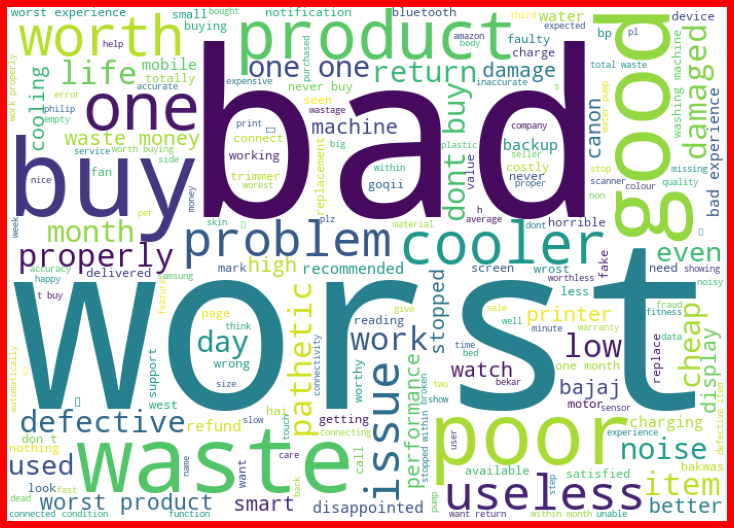

In [38]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 #Getting sense of words in Rating 1
one = df['Review'][df['Rating']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

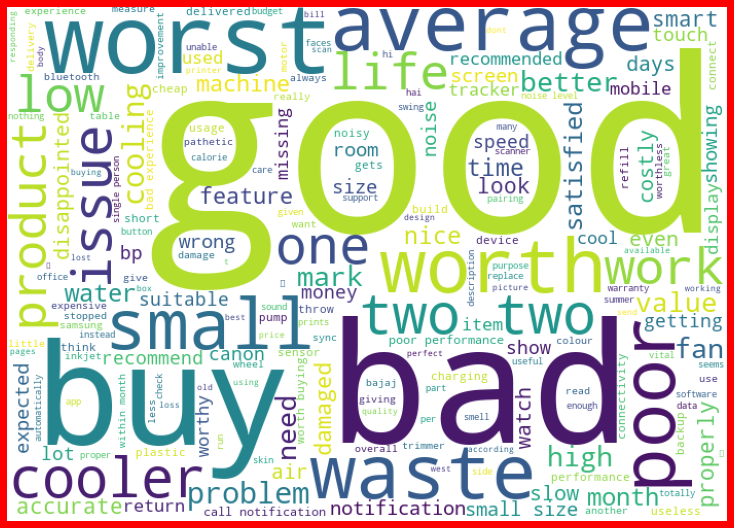

In [39]:
#Getting sense of words in Rating 2
one = df['Review'][df['Rating']==2]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

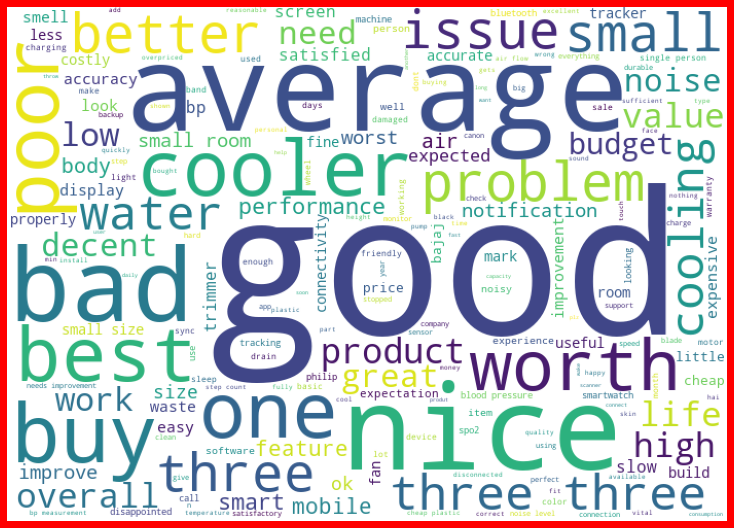

In [40]:
#Getting sense of words in Rating 3
one = df['Review'][df['Rating']==3]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

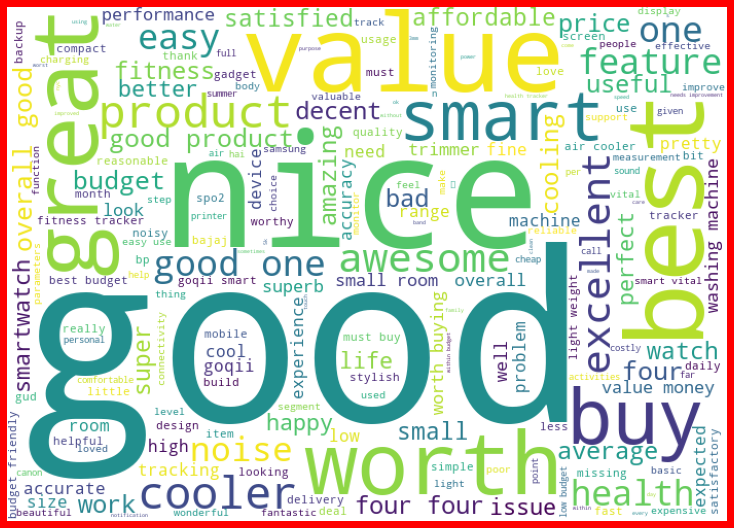

In [41]:
#Getting sense of words in Rating 4
one = df['Review'][df['Rating']==4]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

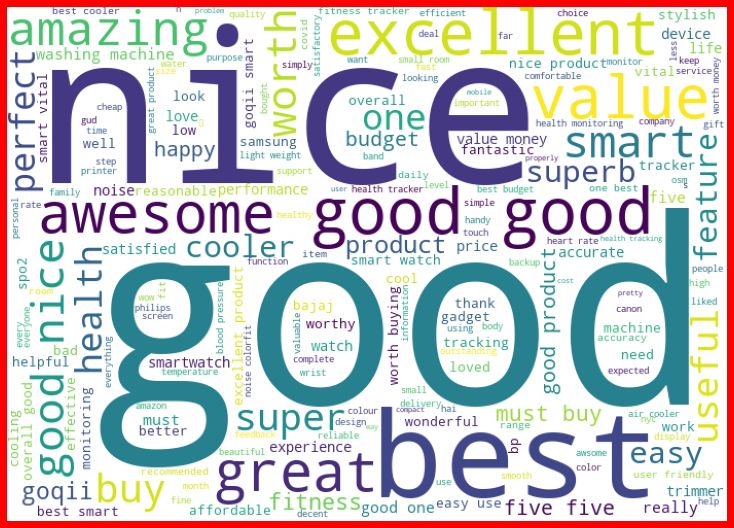

In [42]:
#Getting sense of words in Rating 5
one = df['Review'][df['Rating']==5]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [43]:
df['len_after_clean']=df.Review.str.len()
df

,Rating,Review,len_after_clean
0,1,bad experience,14
1,1,came damaged worst,18
2,3,plain printing.,15
3,3,,0
4,1,defective piece received.,25
...,...,...,...
23387,5,must device,11
23388,4,good,4
23389,4,good,4
23390,1,backup,6


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Review'])

X = features
y = df['Rating']

In [45]:
print("shape of X is :",X.shape)
print("shape of y is :",y.shape)

shape of X is : (23390, 5322)
shape of y is : (23390,)


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=89)

C:\Users\atoranga\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*******************RESULTS*******************
The accuracy score of train is : 69.39473523483784
The accuracy score test is : 62.9328772979906


C:\Users\atoranga\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\atoranga\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

The cross validation score is : 62.584726296007865
Confusion Matrix: 
 [[1485    6   23   22  200]
 [ 270   19   24   15   98]
 [ 225    0   74   48  242]
 [ 101    2   30  168 1079]
 [ 103    1   15   97 2670]]
Classification                precision    recall  f1-score   support

           1       0.68      0.86      0.76      1736
           2       0.68      0.04      0.08       426
           3       0.45      0.13      0.20       589
           4       0.48      0.12      0.19      1380
           5       0.62      0.93      0.74      2886

    accuracy                           0.63      7017
   macro avg       0.58      0.41      0.40      7017
weighted avg       0.60      0.63      0.55      7017

***********************************************


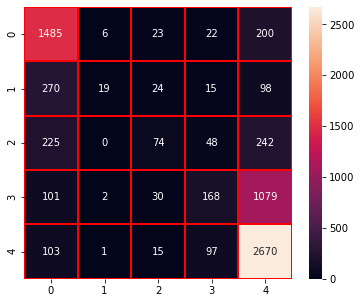

In [56]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(log_reg,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 82.93532034446956
The accuracy score test is : 61.40800912070685
The cross validation score is : 61.2899037990739
Confusion Matrix: 
 [[1418   29   45   33  211]
 [ 245   35   36   21   89]
 [ 204   16   93   37  239]
 [ 104    6   45  181 1044]
 [ 105    3   34  162 2582]]
Classification                precision    recall  f1-score   support

           1       0.68      0.82      0.74      1736
           2       0.39      0.08      0.14       426
           3       0.37      0.16      0.22       589
           4       0.42      0.13      0.20      1380
           5       0.62      0.89      0.73      2886

    accuracy                           0.61      7017
   macro avg       0.50      0.42      0.41      7017
weighted avg       0.56      0.61      0.55      7017

***********************************************


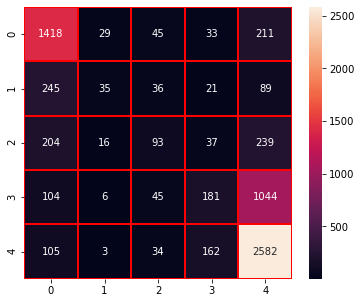

In [57]:
ran_clf = RandomForestClassifier()
ran_clf.fit(X_train, y_train)
y_pred_train = ran_clf.predict(X_train)
y_pred = ran_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(ran_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 82.93532034446956
The accuracy score test is : 58.614792646430104
The cross validation score is : 58.78580721576894
Confusion Matrix: 
 [[1304   56   94   61  221]
 [ 230   47   42   26   81]
 [ 183   25   99   55  227]
 [  94   14   62  217  993]
 [ 103   17   58  262 2446]]
Classification                precision    recall  f1-score   support

           1       0.68      0.75      0.71      1736
           2       0.30      0.11      0.16       426
           3       0.28      0.17      0.21       589
           4       0.35      0.16      0.22      1380
           5       0.62      0.85      0.71      2886

    accuracy                           0.59      7017
   macro avg       0.44      0.41      0.40      7017
weighted avg       0.53      0.59      0.54      7017

***********************************************


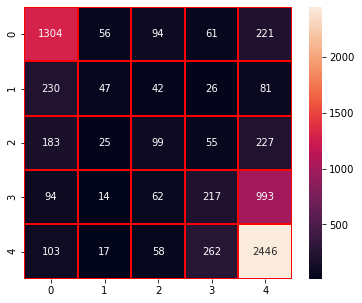

In [58]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)
y_pred_train = dec_clf.predict(X_train)
y_pred = dec_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(dec_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 58.54760886825871
The accuracy score test is : 47.427675644862475
The cross validation score is : 50.10684225006645
Confusion Matrix: 
 [[1151   55  153   99  278]
 [ 185   49   64   43   85]
 [ 151   26  164   84  164]
 [ 127   27  334  228  664]
 [ 179   16  628  327 1736]]
Classification                precision    recall  f1-score   support

           1       0.64      0.66      0.65      1736
           2       0.28      0.12      0.16       426
           3       0.12      0.28      0.17       589
           4       0.29      0.17      0.21      1380
           5       0.59      0.60      0.60      2886

    accuracy                           0.47      7017
   macro avg       0.39      0.36      0.36      7017
weighted avg       0.49      0.47      0.47      7017

***********************************************


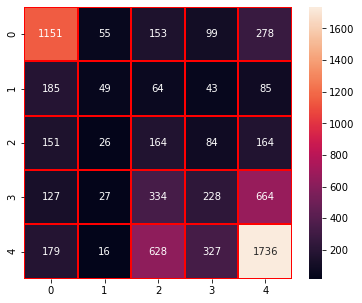

In [59]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
y_pred = knn_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(knn_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 75.09924876320771
The accuracy score test is : 63.20364828274191
The cross validation score is : 62.786277261980814
Confusion Matrix: 
 [[1500    2   28    8  198]
 [ 278   21   27    7   93]
 [ 219    2   82   43  243]
 [ 114    2   35  148 1081]
 [ 107    0   17   78 2684]]
Classification                precision    recall  f1-score   support

           1       0.68      0.86      0.76      1736
           2       0.78      0.05      0.09       426
           3       0.43      0.14      0.21       589
           4       0.52      0.11      0.18      1380
           5       0.62      0.93      0.75      2886

    accuracy                           0.63      7017
   macro avg       0.61      0.42      0.40      7017
weighted avg       0.61      0.63      0.55      7017

***********************************************


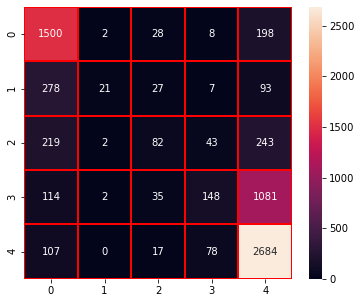

In [60]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_train = svm_clf.predict(X_train)
y_pred = svm_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(svm_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

## Hyper parameter tuning

In [69]:
param_grid = [
    {"n_estimators": range(20, 100, 2),  
     "max_depth": [1, 2, 4, 6, 9, 12],
     "min_samples_split": [2, 6, 8],
     "min_samples_leaf": [1, 2, 3],
     }
]


ran_clf  =  RandomForestClassifier(random_state = 89)
rf_grid = GridSearchCV(ran_clf,param_grid,cv = 2,)
rf_grid.fit(X_train,y_train)
params = rf_grid.best_params_
print("Best Params  ",params) 

Best Params   {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 26}


AttributeError: 'RandomForestClassifier' object has no attribute 'best_score_'

In [77]:
rand_clfr = RandomForestClassifier(n_estimators = 26,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=12,
                                 criterion='entropy',bootstrap = True)
rand_clfr.fit(X_train,y_train)
rf_pred = rand_clfr.predict(X_test)
print('Final Random Forest Classifier Model')
print('Accuracy Score :', accuracy_score(y_test, rf_pred))
print('\n')
print('Confusion matrix of Random Forest Classifier :',confusion_matrix(y_test, rf_pred))
print('\n')
print('Classification Report of Random Forest Classifier: ',classification_report(y_test, rf_pred))

Final Random Forest Classifier Model
Accuracy Score : 0.46273336183554226


Confusion matrix of Random Forest Classifier : [[ 384    0    0    0 1352]
 [  54    0    0    0  372]
 [  41    0    0    0  548]
 [  15    0    0    0 1365]
 [  23    0    0    0 2863]]


Classification Report of Random Forest Classifier:                precision    recall  f1-score   support

           1       0.74      0.22      0.34      1736
           2       0.00      0.00      0.00       426
           3       0.00      0.00      0.00       589
           4       0.00      0.00      0.00      1380
           5       0.44      0.99      0.61      2886

    accuracy                           0.46      7017
   macro avg       0.24      0.24      0.19      7017
weighted avg       0.36      0.46      0.34      7017



C:\Users\atoranga\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atoranga\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\atoranga\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Saving the best Model

In [ ]:
import pickle
filename = 'Rating_Prediction.pkl'
pickle.dump(rf_final,open(filename,'wb'))